In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import sqlite3

In [2]:
#Конвертация с формата csv в датафрейм
df = pd.read_csv('test_data.csv')
df.head()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.469986,1.000000,0.667595,29.58,Triassic,Normal polarity,False,0.583560,Limestone,Bottom,120.12,73.83,41072
1,0.619865,0.474208,1.218381,69.87,Cretaceous,Reversed polarity,True,0.942719,Shale,Middle,72.82,191.68,42085
2,0.767736,0.478731,0.119801,96.38,Cretaceous,Normal polarity,False,0.377531,Sandstone,Bottom,105.47,82.25,50436
3,0.275121,0.400594,0.634760,134.10,Triassic,Normal polarity,True,0.323820,Sandstone,Middle,94.99,47.99,25923
4,0.407470,0.039705,0.824597,124.10,Triassic,Normal polarity,False,1.219120,Shale,Middle,139.93,532.62,30272


In [3]:
#Статистика
df.describe()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,isotopic_composition,fossil_size,fossil_weight,age
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,0.496433,0.440684,0.547931,158.043745,0.956632,69.467227,320.156882,41251.645455
std,0.257374,0.243740,0.292226,90.562171,0.537401,36.274039,189.229364,15593.580441
min,0.003261,0.002765,0.001097,1.210000,0.008463,1.360000,0.050000,6106.000000
25%,0.305624,0.259897,0.318108,87.025000,0.560966,41.440000,173.000000,29536.750000
50%,0.480013,0.434407,0.545213,147.495000,0.902628,68.635000,307.605000,40677.500000
75%,0.674765,0.601421,0.753442,221.847500,1.294061,94.482500,452.320000,50816.250000
max,1.321068,1.000000,1.527375,522.110000,3.148906,176.990000,984.350000,93741.000000


In [4]:
#информация о формате данных и пропущенных значениях
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uranium_lead_ratio          1100 non-null   float64
 1   carbon_14_ratio             1100 non-null   float64
 2   radioactive_decay_series    1100 non-null   float64
 3   stratigraphic_layer_depth   1100 non-null   float64
 4   geological_period           1100 non-null   object 
 5   paleomagnetic_data          1100 non-null   object 
 6   inclusion_of_other_fossils  1100 non-null   bool   
 7   isotopic_composition        1100 non-null   float64
 8   surrounding_rock_type       1100 non-null   object 
 9   stratigraphic_position      1100 non-null   object 
 10  fossil_size                 1100 non-null   float64
 11  fossil_weight               1100 non-null   float64
 12  age                         1100 non-null   int64  
dtypes: bool(1), float64(7), int64(1),

In [5]:
#Создание базы данных fossil_age.db
conn = sqlite3.connect('fossil_age.db')
cursor = conn.cursor()

In [6]:
#Создание таблицы fossil в БД fossil_age.db
cursor.execute('''CREATE TABLE IF NOT EXISTS fossil (
               id INTEGER PRIMARY KEY,
               uranium_lead_ratio FLOAT,
               carbon_14_ratio FLOAT,
               radioactive_decay_series FLOAT,
               stratigraphic_layer_depth FLOAT,
               geological_period TEXT,
               paleomagnetic_data TEXT,
               inclusion_of_other_fossils BINARY,
               isotopic_composition FLOAT,
               surrounding_rock_type TEXT,
               stratigraphic_position TEXT,
               fossil_size FLOAT,
               fossil_weight FLOAT,
               age INTEGER
               )''')

In [7]:
df.columns

Index(['uranium_lead_ratio', 'carbon_14_ratio', 'radioactive_decay_series',
       'stratigraphic_layer_depth', 'geological_period', 'paleomagnetic_data',
       'inclusion_of_other_fossils', 'isotopic_composition',
       'surrounding_rock_type', 'stratigraphic_position', 'fossil_size',
       'fossil_weight', 'age'],
      dtype='object')

In [51]:
#Подготовка данных перед импортом1 - Стандартизация
numerical_features = ['uranium_lead_ratio', 'carbon_14_ratio', 'radioactive_decay_series',
       'stratigraphic_layer_depth', 'isotopic_composition', 'fossil_size','fossil_weight',
       'fossil_weight']
categorical_features = ['geological_period', 'paleomagnetic_data','surrounding_rock_type', 'stratigraphic_position']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [43]:
#Подготовка данных перед импортом
df["inclusion_of_other_fossils"] = df["inclusion_of_other_fossils"].astype(int)


0       0
1       1
2       0
3       1
4       0
       ..
1095    0
1096    0
1097    1
1098    1
1099    1
Name: inclusion_of_other_fossils, Length: 1100, dtype: int64

In [10]:
#Импорт данных в таблицу
for index, row in df.iterrows():
    cursor.execute('''INSERT INTO fossil (
                   uranium_lead_ratio,
                   carbon_14_ratio,
                   radioactive_decay_series,
                   stratigraphic_layer_depth,
                   geological_period,
                   paleomagnetic_data,
                   inclusion_of_other_fossils,
                   isotopic_composition,
                   surrounding_rock_type,
                   stratigraphic_position,
                   fossil_size,
                   fossil_weight,
                   age) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)''', row)


C:\Users\User\AppData\Local\Temp\ipykernel_56580\4050233417.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cursor.execute('''INSERT INTO fossil (


In [11]:
#Корреляция возраста и содержания 14C
#14C в останках постепенно распадается, и по его остаточной удельной активности можно оценить время гибели организма
cursor.execute('''SELECT age,ROUND(carbon_14_ratio,2) FROM fossil ORDER BY carbon_14_ratio LIMIT 10''')
cursor.fetchall()

[(26473, -1.8),
 (24069, -1.8),
 (25263, -1.8),
 (48800, -1.8),
 (39792, -1.79),
 (28792, -1.79),
 (28913, -1.78),
 (33840, -1.78),
 (22851, -1.78),
 (33777, -1.77)]

In [12]:
#Уран-свинцовый метод: основан на определении того, какая доля урана успела распасться за время существования объекта
#Чем больше урана распалось, тем больше соотношение уран/свинец - тем старше останки
cursor.execute('''SELECT age,ROUND(uranium_lead_ratio,2) FROM fossil ORDER BY uranium_lead_ratio DESC LIMIT 10''')
cursor.fetchall()

[(78347, 3.21),
 (65287, 2.76),
 (82135, 2.71),
 (67498, 2.7),
 (75203, 2.66),
 (93741, 2.64),
 (75703, 2.64),
 (75600, 2.62),
 (61872, 2.61),
 (90799, 2.59)]

In [13]:
#Уран-свинцовый метод2
cursor.execute('''SELECT age,ROUND(uranium_lead_ratio,2) FROM fossil ORDER BY uranium_lead_ratio LIMIT 10''')
cursor.fetchall()

[(20897, -1.92),
 (7916, -1.91),
 (18491, -1.91),
 (19294, -1.9),
 (15381, -1.88),
 (10690, -1.88),
 (26175, -1.88),
 (8427, -1.87),
 (13309, -1.87),
 (11461, -1.86)]

In [14]:
#Вывод количества данных по геологическому периоду
cursor.execute('''SELECT COUNT(*), geological_period FROM fossil GROUP BY geological_period''')
cursor.fetchall()

[(213, 'Cambrian'),
 (10, 'Carboniferous'),
 (166, 'Cretaceous'),
 (110, 'Devonian'),
 (120, 'Jurassic'),
 (71, 'Neogene'),
 (25, 'Ordovician'),
 (108, 'Paleogene'),
 (105, 'Permian'),
 (5, 'Silurian'),
 (167, 'Triassic')]

In [15]:
#Вывод средних значений для останков по уран-свинцовому содержанию и углерода 14 сгруппированных по геологическому периоду
cursor.execute('''SELECT ROUND(AVG(uranium_lead_ratio),2), ROUND(AVG(carbon_14_ratio),2), geological_period FROM fossil GROUP BY geological_period''')
cursor.fetchall()

[(0.05, -0.05, 'Cambrian'),
 (0.29, 0.27, 'Carboniferous'),
 (-0.03, -0.1, 'Cretaceous'),
 (0.04, 0.09, 'Devonian'),
 (0.0, -0.12, 'Jurassic'),
 (-0.09, 0.13, 'Neogene'),
 (-0.2, 0.1, 'Ordovician'),
 (0.03, 0.08, 'Paleogene'),
 (0.11, 0.05, 'Permian'),
 (0.78, -0.21, 'Silurian'),
 (-0.12, 0.03, 'Triassic')]

Text(0.5, 1.0, 'Распределение по возрасту останков')

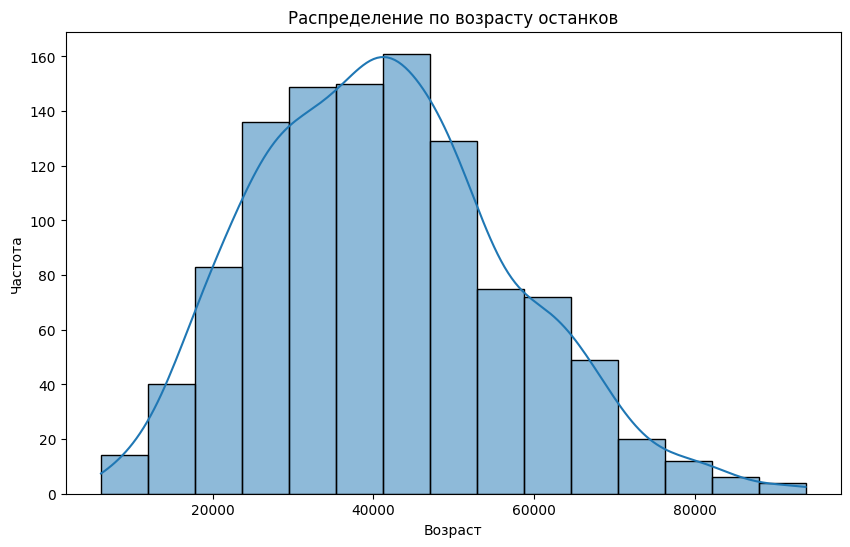

In [17]:
#Визуализация таргета
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins = 15, kde = True)
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение по возрасту останков')


Нормальное распределение

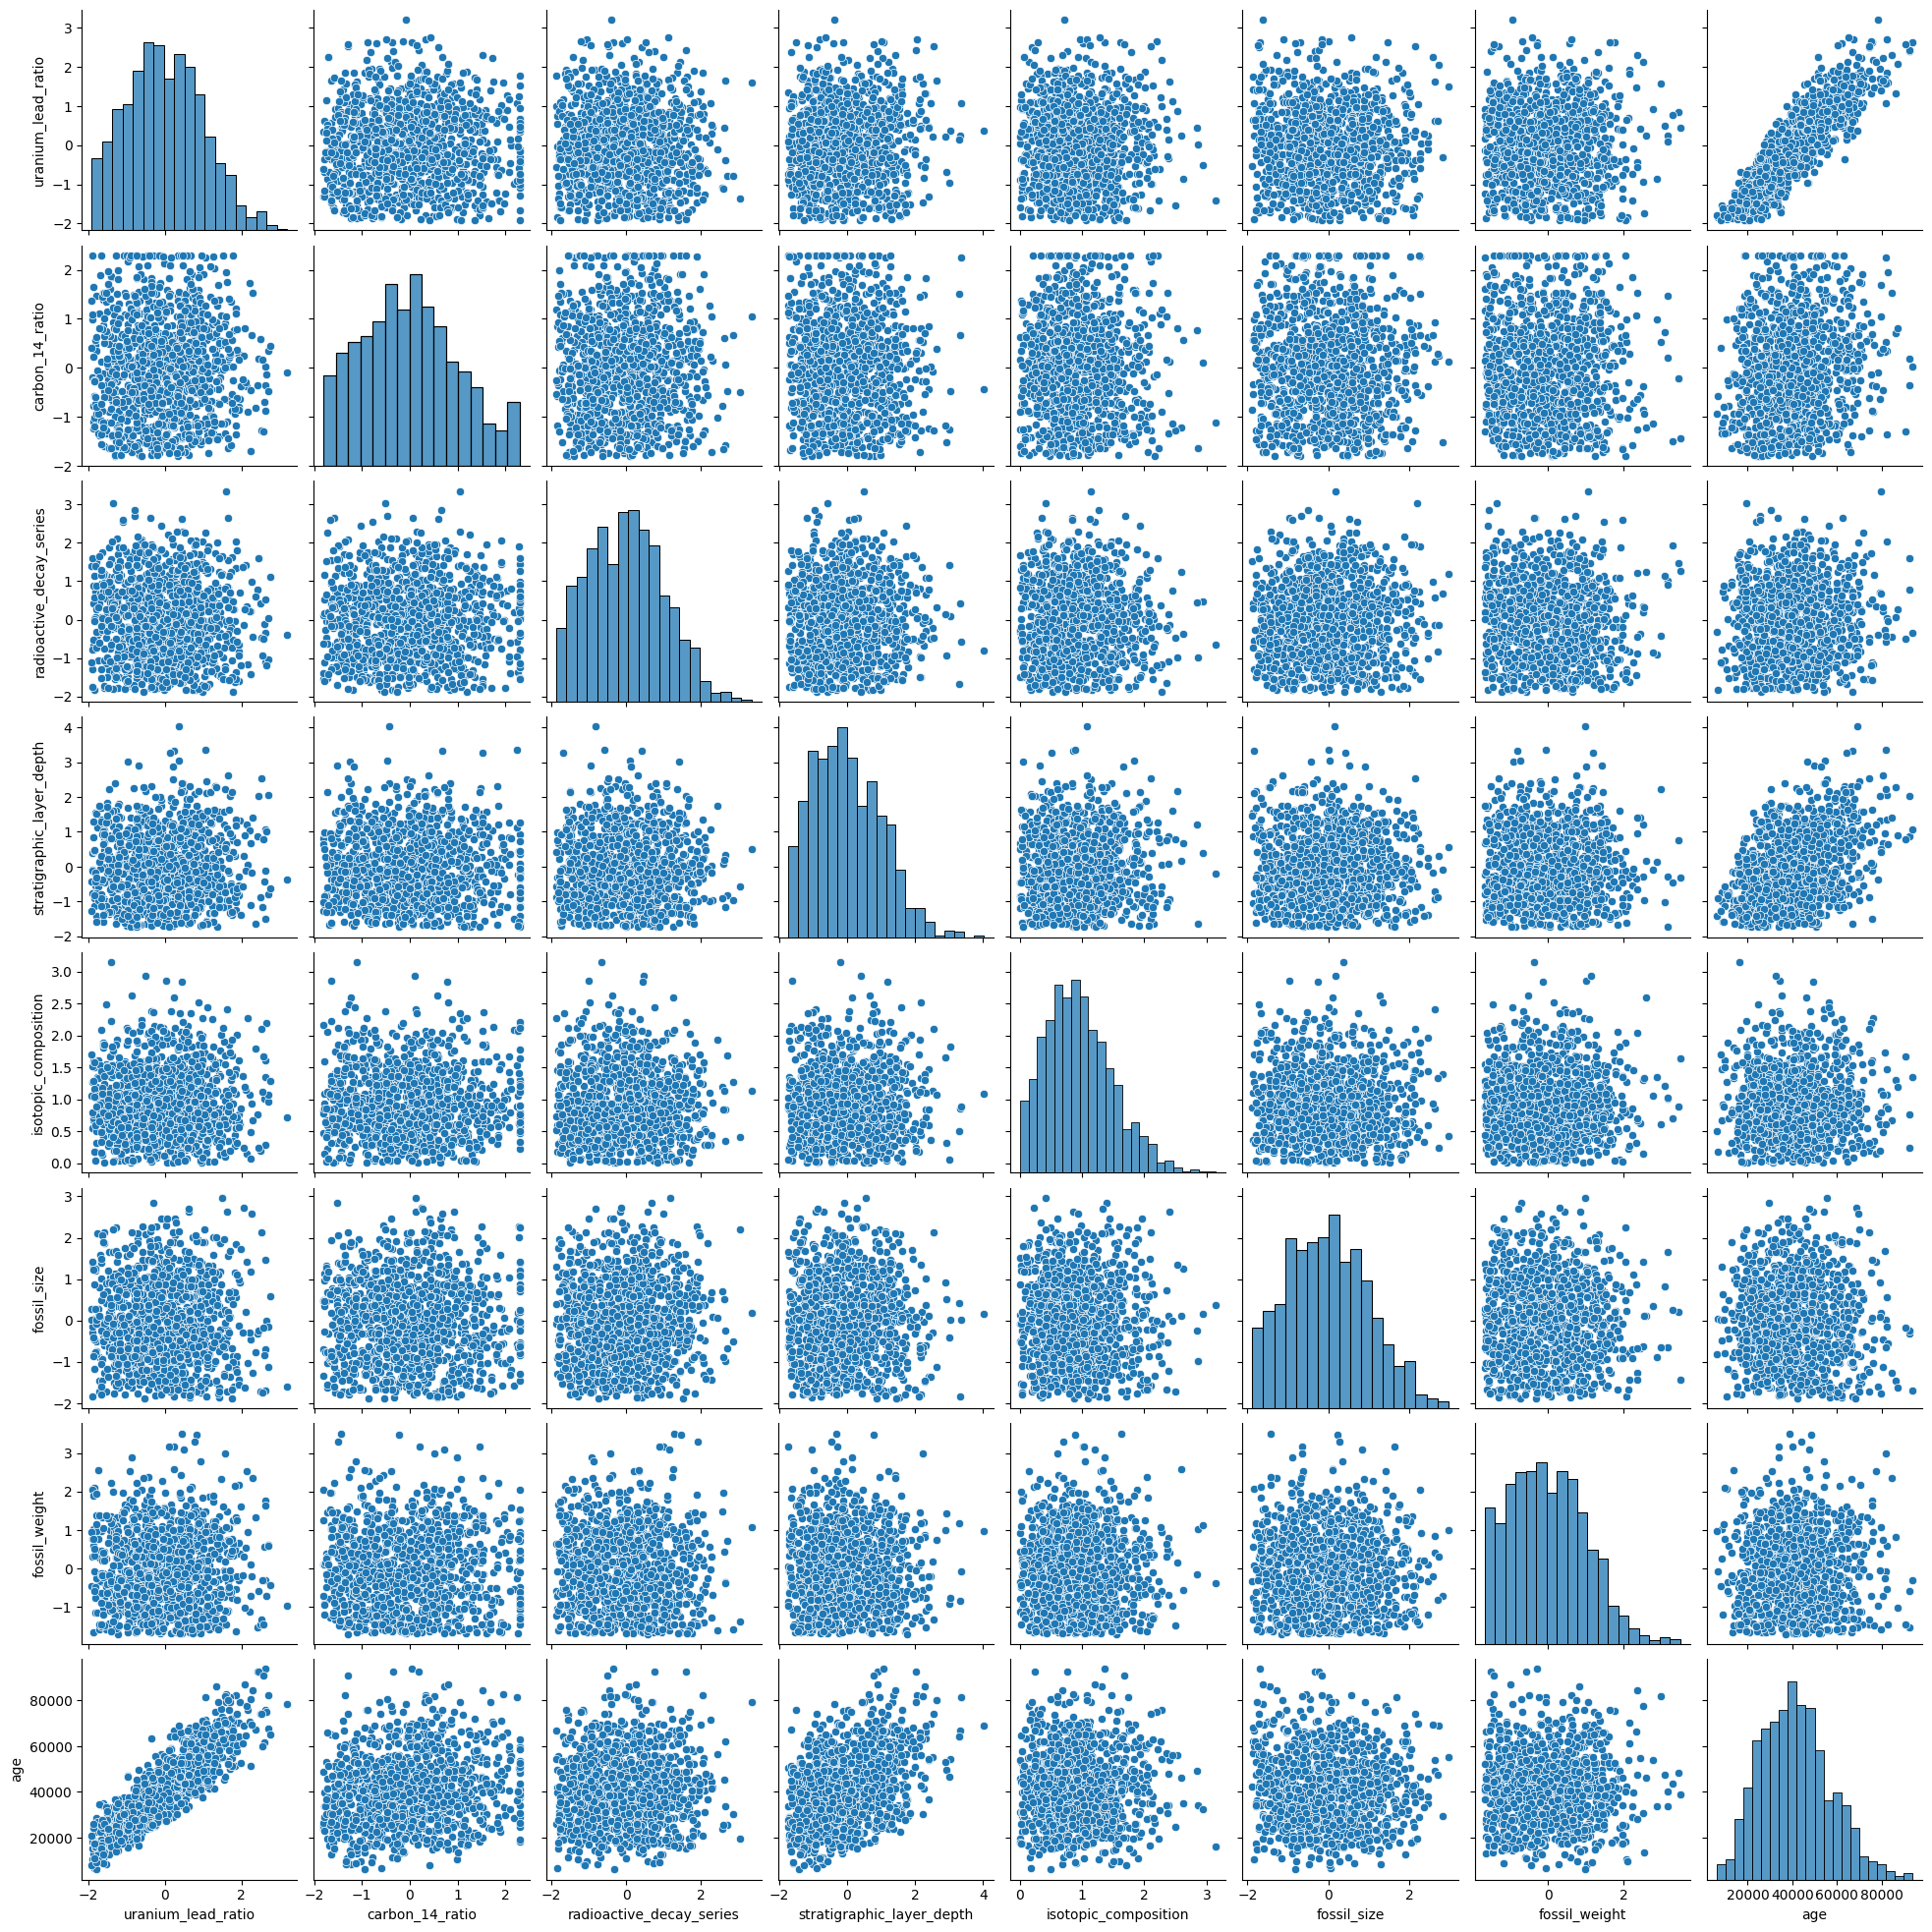

In [ ]:
#Парные диаграммы для численных признаков с таргетом
df_pairplot = df.drop(columns=['inclusion_of_other_fossils'])
sns.pairplot(df_pairplot)
plt.show()

Из всех признаков выделяется uranium_lead_ratio, так как распределение точек на диаграмме направлено, в других признаках присутсвует сильная дисперсия 

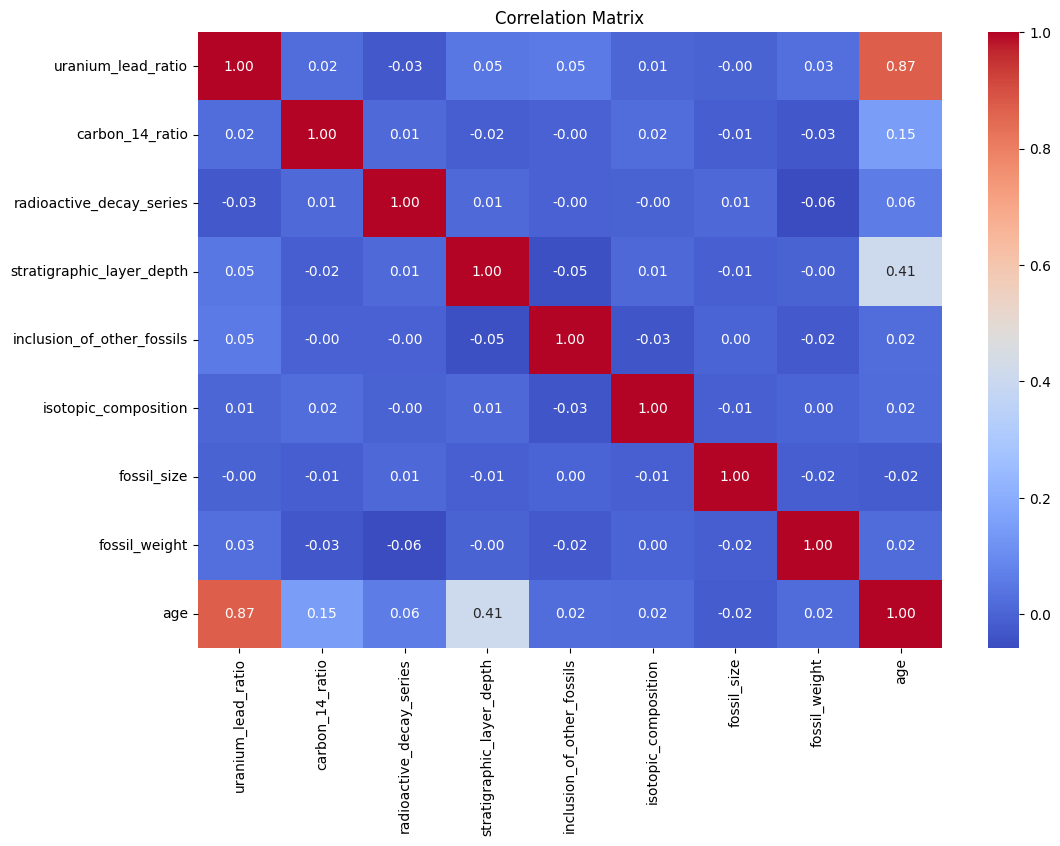

In [21]:
#Корреляционная матрица
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Как и графики выше, исходя из корреляционной матрицы - наибольшая корреляция возраста останков идет с параметром содержания урана-платины.
Также, для дальнейшего анализа имеет место включения таких признаков как: содержание урана-платины, углерода С14, время радиоактивного распада и глубина стратиграфического слоя. Корреляция с остальными признаками очень слаба.

In [23]:
categorical_features

['geological_period',
 'paleomagnetic_data',
 'inclusion_of_other_fossils',
 'surrounding_rock_type',
 'stratigraphic_position']

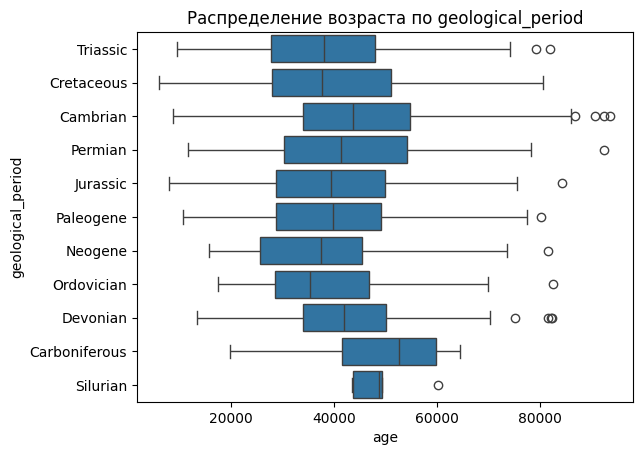

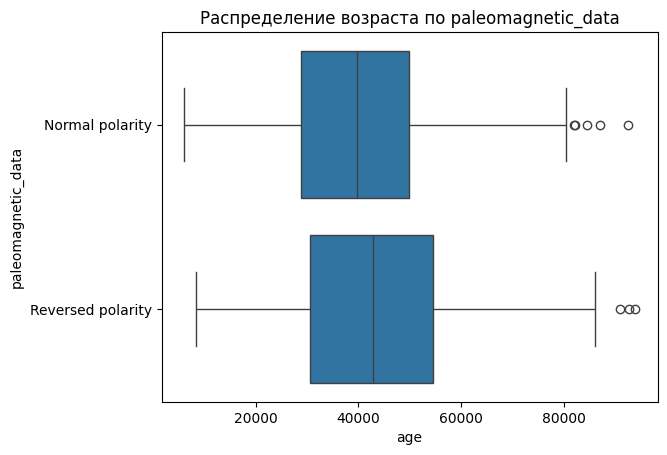

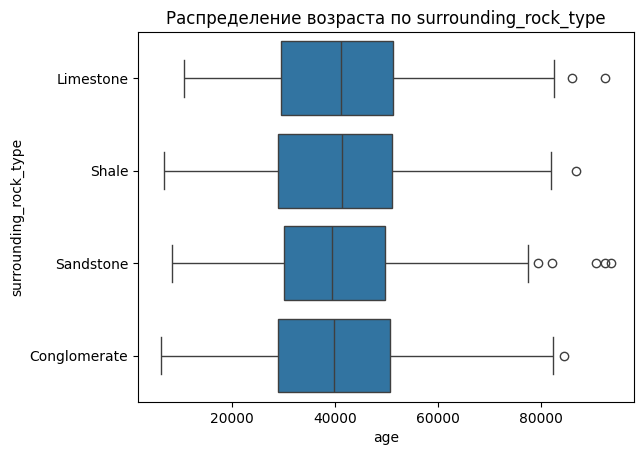

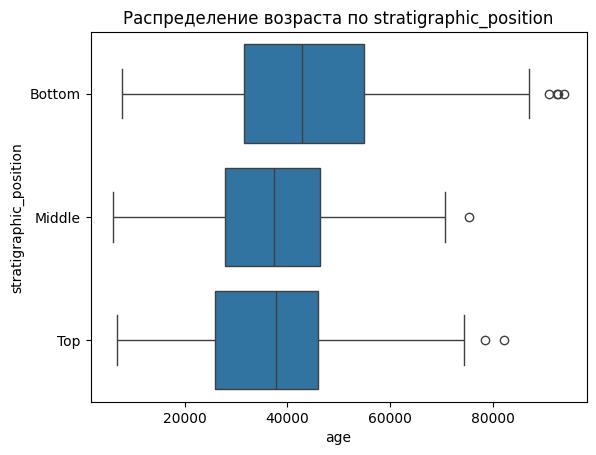

In [28]:
for feature in categorical_features:
    sns.boxplot(data = df, x = df['age'], y = df[feature])
    plt.title(f'Распределение возраста по {feature}')
    plt.show()


Исходя из ящиков с усами видно, что признак типов пород вокруг останков никак не влияет на таргетное значение

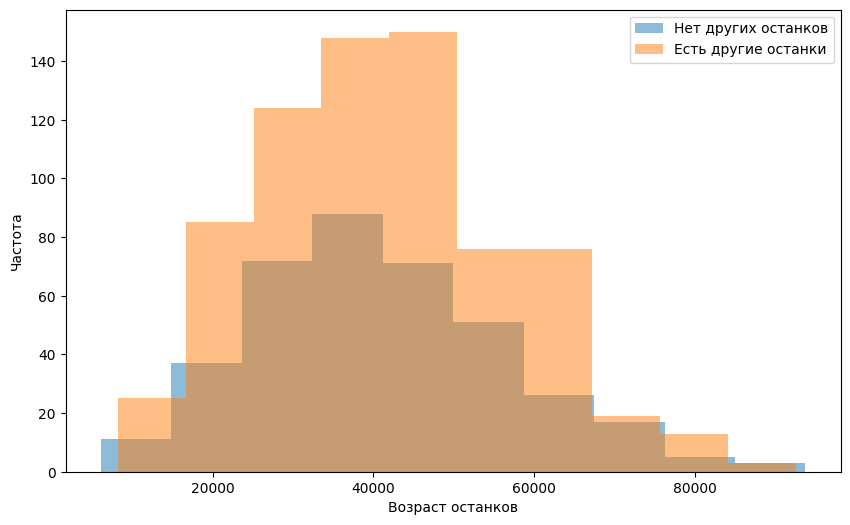

In [56]:
#Визуализация бинарного признака - включение других останков
plt.figure(figsize=(10,6))
plt.hist(df.loc[df["inclusion_of_other_fossils"] == 0, 'age'], alpha = 0.5, label = 'Нет других останков')
plt.hist(df.loc[df["inclusion_of_other_fossils"] == 1, 'age'], alpha = 0.5, label = 'Есть другие останки')
plt.ylabel('Частота')
plt.xlabel('Возраст останков')
plt.legend()
plt.show()

Из графика видно, что превалирующее число раскопок идет не в индивидуальном виде, а наряду с включением останков другого происхождения. Однако распределение признаков показало, что наличие/отсутствие других останков не влияет на наш таргет.

In [76]:
encoder = OneHotEncoder()
encoder = OneHotEncoder(sparse_output=False)  # Используем новый параметр `sparse_output`
df[categorical_features] = encoder.fit_transform(df[categorical_features])
df[categorical_features] = pd.DataFrame(df[categorical_features], columns=categorical_features)

In [77]:
#Выбор признаков для дальнейшего анализа
features = ['uranium_lead_ratio', 'carbon_14_ratio', 'radioactive_decay_series',
       'stratigraphic_layer_depth', 'geological_period', 'paleomagnetic_data', 'stratigraphic_position']
target = 'age'
x = df[features]
y = df[target]

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42 )
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [82]:
print(f'root mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'r2 score: {r2_score(y_test, y_pred)}')

root mean squared error: 4602.026034472135
r2 score: 0.9206960658532383


Квадрат среднеквадратичной ошибки дал удовлетворительные результаты, так как среднее значение возраста останков датасета 41251.645455
Показатель коэффициента детерминации показало, что изменчивость выбранных признаков с с 92% долей влияет на изменение целевой переменной